In [96]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


- The TRAIN data contains the sale price that we can use to compare data to

In [99]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [100]:
y = pd.DataFrame(train_data.SalePrice)

In [101]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [102]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [103]:
features = [#'Id', 
        'MSSubClass', 
        #'MSZoning', 
        'LotFrontage', 'LotArea', 
        #'Street',
        # 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        # 'LandSlope', 
        'Neighborhood', 
        # 'Condition1', 'Condition2', 'BldgType',
       # 'HouseStyle', 
       'OverallQual', 
       # 'OverallCond', 
       'YearBuilt', 'YearRemodAdd',
       # 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 
       'ExterQual', 'ExterCond', 
       # 'Foundation', 'BsmtQual',
       # 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       # 'BsmtFinSF1',
       # 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', 
       # 'Heating',
       # 'HeatingQC', 
       # 'CentralAir', 'Electrical', 
       '1stFlrSF', '2ndFlrSF',
       # 'LowQualFinSF', 
       'GrLivArea', 
       # 'BsmtFullBath', 'BsmtHalfBath', 
       'FullBath', 'HalfBath', 
       # 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 
       'Functional', 
       # 'Fireplaces', 'FireplaceQu', 'GarageType',
       # 'GarageYrBlt', 'GarageFinish', 
       'GarageCars', 'GarageArea', 
       # 'GarageQual',
       # 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       # 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
       # 'PoolArea', 'PoolQC',
       # 'Fence', 'MiscFeature', 'MiscVal', 
        # 'MoSold', 'YrSold', 
       'SaleType',
       'SaleCondition',
       'SalePrice'
]

testfeatures = [#'Id', 
        'MSSubClass', 
        #'MSZoning', 
        'LotFrontage', 'LotArea', 
        #'Street',
        # 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        # 'LandSlope', 
        'Neighborhood', 
        # 'Condition1', 'Condition2', 'BldgType',
       # 'HouseStyle', 
       'OverallQual', 
       # 'OverallCond', 
       'YearBuilt', 'YearRemodAdd',
       # 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 
       'ExterQual', 'ExterCond', 
       # 'Foundation', 'BsmtQual',
       # 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
       # 'BsmtFinSF1',
       # 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 
       'TotalBsmtSF', 
       # 'Heating',
       # 'HeatingQC', 
       # 'CentralAir', 'Electrical', 
       '1stFlrSF', '2ndFlrSF',
       # 'LowQualFinSF', 
       'GrLivArea', 
       # 'BsmtFullBath', 'BsmtHalfBath', 
       'FullBath', 'HalfBath', 
       # 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 
       'Functional', 
       # 'Fireplaces', 'FireplaceQu', 'GarageType',
       # 'GarageYrBlt', 'GarageFinish', 
       'GarageCars', 'GarageArea', 
       # 'GarageQual',
       # 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       # 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
       # 'PoolArea', 'PoolQC',
       # 'Fence', 'MiscFeature', 'MiscVal', 
        # 'MoSold', 'YrSold', 
        'SaleType',
       'SaleCondition',
       # 'SalePrice'
]

In [104]:

X = pd.DataFrame(train_data[features])
X

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,Functional,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,60,65.0,8450,CollgCr,7,2003,2003,196.0,Gd,TA,...,1710,2,1,8,Typ,2,548,WD,Normal,208500
1,20,80.0,9600,Veenker,6,1976,1976,0.0,TA,TA,...,1262,2,0,6,Typ,2,460,WD,Normal,181500
2,60,68.0,11250,CollgCr,7,2001,2002,162.0,Gd,TA,...,1786,2,1,6,Typ,2,608,WD,Normal,223500
3,70,60.0,9550,Crawfor,7,1915,1970,0.0,TA,TA,...,1717,1,0,7,Typ,3,642,WD,Abnorml,140000
4,60,84.0,14260,NoRidge,8,2000,2000,350.0,Gd,TA,...,2198,2,1,9,Typ,3,836,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,Gilbert,6,1999,2000,0.0,TA,TA,...,1647,2,1,7,Typ,2,460,WD,Normal,175000
1456,20,85.0,13175,NWAmes,6,1978,1988,119.0,TA,TA,...,2073,2,0,7,Min1,2,500,WD,Normal,210000
1457,70,66.0,9042,Crawfor,7,1941,2006,0.0,Ex,Gd,...,2340,2,0,9,Typ,1,252,WD,Normal,266500
1458,20,68.0,9717,NAmes,5,1950,1996,0.0,TA,TA,...,1078,1,0,5,Typ,1,240,WD,Normal,142125


In [105]:
X.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,1057.429452,1162.626712,346.992466,1515.463699,1.565068,0.382877,6.517808,1.767123,472.980137,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,438.705324,386.587738,436.528436,525.480383,0.550916,0.502885,1.625393,0.747315,213.804841,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,795.750000,882.000000,0.000000,1129.500000,1.000000,0.000000,5.000000,1.000000,334.500000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,991.500000,1087.000000,0.000000,1464.000000,2.000000,0.000000,6.000000,2.000000,480.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,1298.250000,1391.250000,728.000000,1776.750000,2.000000,1.000000,7.000000,2.000000,576.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,14.000000,4.000000,1418.000000,755000.000000


In [106]:
X.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
Neighborhood       0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
ExterQual          0
ExterCond          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Functional         0
GarageCars         0
GarageArea         0
SaleType           0
SaleCondition      0
SalePrice          0
dtype: int64

In [107]:
X_test = test_data[testfeatures]
X_test.isna().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
Neighborhood       0
OverallQual        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
ExterQual          0
ExterCond          0
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Functional         2
GarageCars         1
GarageArea         1
SaleType           1
SaleCondition      0
dtype: int64

In [108]:
X2 = train_data.drop('SalePrice', axis=1).copy()
X2_label = train_data['SalePrice']
y2 = test_data

Index['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],

In [109]:
numfeat = ['LotFrontage', 'LotArea', 'OverallQual', 
           'YearBuilt', 
           'YearRemodAdd', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea']
catfeat = ['MSSubClass', 'MSZoning', 'Street',
       'Utilities', 'Neighborhood',
       'Foundation', 'Functional',
       'SaleType',
       'SaleCondition',]

In [110]:
x2corr = X2[numfeat].corr()
x2corr

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
LotFrontage,1.000000,0.426095,0.251646,0.123349,0.088866,0.392075,0.457181,0.080177,0.402797,0.100949,0.198769,0.053532,0.263170,0.352096,0.266639,0.344997,0.088521,0.151972,0.206167
LotArea,0.426095,1.000000,0.105806,0.014228,0.013788,0.260833,0.299475,0.050986,0.263116,0.158155,0.126031,0.014259,0.119690,0.190015,0.271364,0.180403,0.171698,0.084774,0.077672
OverallQual,0.251646,0.105806,1.000000,0.572323,0.550684,0.537808,0.476224,0.295493,0.593007,0.111098,0.550600,0.273458,0.101676,0.427452,0.396765,0.562022,0.238923,0.308819,0.065166
YearBuilt,0.123349,0.014228,0.572323,1.000000,0.592855,0.391452,0.281986,0.010308,0.199010,0.187599,0.468271,0.242656,-0.070651,0.095589,0.147716,0.478954,0.224880,0.188686,0.004950
YearRemodAdd,0.088866,0.013788,0.550684,0.592855,1.000000,0.291066,0.240379,0.140024,0.287389,0.119470,0.439046,0.183331,-0.040581,0.191740,0.112581,0.371600,0.205726,0.226298,0.005829
TotalBsmtSF,0.392075,0.260833,0.537808,0.391452,0.291066,1.000000,0.819530,-0.174512,0.454868,0.307351,0.323722,-0.048804,0.050450,0.285573,0.339519,0.486665,0.232019,0.247264,0.126053
1stFlrSF,0.457181,0.299475,0.476224,0.281986,0.240379,0.819530,1.000000,-0.202646,0.566024,0.244671,0.380637,-0.119916,0.127401,0.409516,0.410531,0.489782,0.235459,0.211671,0.131525
2ndFlrSF,0.080177,0.050986,0.295493,0.010308,0.140024,-0.174512,-0.202646,1.000000,0.687501,-0.169494,0.421378,0.609707,0.502901,0.616423,0.194561,0.138347,0.092165,0.208026,0.081487
GrLivArea,0.402797,0.263116,0.593007,0.199010,0.287389,0.454868,0.566024,0.687501,1.000000,0.034836,0.630012,0.415772,0.521270,0.825489,0.461679,0.468997,0.247433,0.330224,0.170205
BsmtFullBath,0.100949,0.158155,0.111098,0.187599,0.119470,0.307351,0.244671,-0.169494,0.034836,1.000000,-0.064512,-0.030905,-0.150673,-0.053275,0.137928,0.179189,0.175315,0.067341,0.067616


In [111]:
X2['LotFrontage'] = X2['LotFrontage'].fillna(X2.groupby('Neighborhood')['LotFrontage'].transform('median').astype('float64'))
y2['LotFrontage'] = y2['LotFrontage'].fillna(y2.groupby('Neighborhood')['LotFrontage'].transform('median').astype('float64'))


In [112]:
y2.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [113]:

pd.set_option('display.max_rows', 100)
X2[catfeat].isna().sum()
y2[catfeat].isna().sum()

MSSubClass       0
MSZoning         4
Street           0
Utilities        2
Neighborhood     0
Foundation       0
Functional       2
SaleType         1
SaleCondition    0
dtype: int64

In [114]:

X2[numfeat].isna().sum()
y2[numfeat].isna().sum()

LotFrontage     0
LotArea         0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageArea      1
WoodDeckSF      0
OpenPorchSF     0
PoolArea        0
dtype: int64

<Axes: >

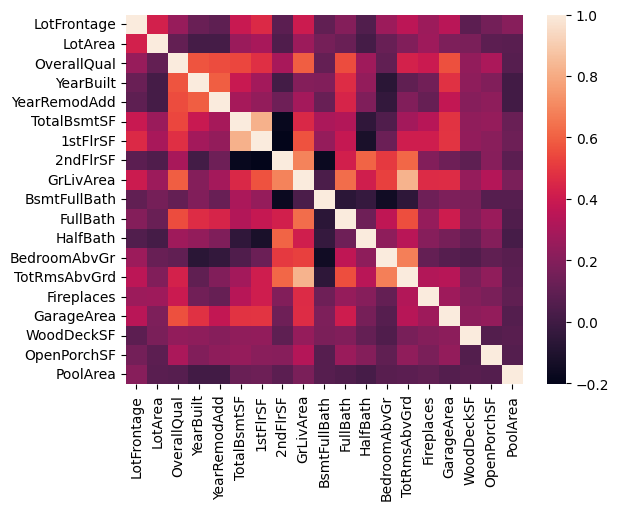

In [115]:

sns.heatmap(x2corr, xticklabels=1, yticklabels=1, )

In [116]:
from sklearn.impute import SimpleImputer


X2 = X2[numfeat + catfeat]
y2 = y2[numfeat + catfeat]

In [117]:
y2[catfeat].isna().sum()
y2['Utilities'] = y2['Utilities'].fillna('NoSeWa')

/var/folders/h6/nnzy69c13sn43ypbbpk2877m0000gn/T/ipykernel_43449/3511607932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2['Utilities'] = y2['Utilities'].fillna('NoSeWa')


In [118]:
y2.isna().sum()

LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      1
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
PoolArea         0
MSSubClass       0
MSZoning         4
Street           0
Utilities        0
Neighborhood     0
Foundation       0
Functional       2
SaleType         1
SaleCondition    0
dtype: int64

In [119]:
y2.dtypes

LotFrontage      float64
LotArea            int64
OverallQual        int64
YearBuilt          int64
YearRemodAdd       int64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
PoolArea           int64
MSSubClass         int64
MSZoning          object
Street            object
Utilities         object
Neighborhood      object
Foundation        object
Functional        object
SaleType          object
SaleCondition     object
dtype: object

In [120]:
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder

X2_dummy = pd.get_dummies(X2)
y2_dummy = pd.get_dummies(y2)

In [121]:
ss = StandardScaler()
X2_process = ss.fit_transform(X2_dummy)
y2_process = ss.fit_transform(y2_dummy)

In [122]:
X2_process = pd.DataFrame(X2_process, columns=X2_dummy.columns)
y2_process = pd.DataFrame(y2_process, columns=y2_dummy.columns)
X2_process
y2_process

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.526150,0.363929,-0.751101,-0.340945,-1.072885,-0.370681,-0.654561,-0.775254,-1.215588,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1,0.573788,0.897861,-0.054877,-0.439695,-1.214908,0.638925,0.433298,-0.775254,-0.323539,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
2,0.240326,0.809646,-0.751101,0.844059,0.678742,-0.266785,-0.574165,0.891944,0.294508,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
3,0.430876,0.032064,-0.054877,0.876976,0.678742,-0.271302,-0.579190,0.837243,0.243004,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
4,-1.236435,-0.971808,1.337571,0.679475,0.394694,0.528252,0.310192,-0.775254,-0.424487,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.284458,-1.591330,-1.447325,-0.044694,-0.646813,-1.129580,-1.533893,0.523306,-0.811797,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365
1455,-2.284458,-1.599808,-1.447325,-0.044694,-0.646813,-1.129580,-1.533893,0.523306,-0.811797,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,3.923424,-0.074253,-0.091066,-0.134699,-2.172917,-0.299365
1456,4.337145,2.055150,-0.751101,-0.373861,0.584059,0.401769,0.169499,-0.775254,-0.539856,1.066131,...,-0.045392,-0.295268,-0.052432,0.399722,3.923424,-0.074253,-0.091066,-0.134699,-2.172917,-0.299365
1457,-0.331323,0.125527,-0.751101,0.679475,0.394694,-0.302923,-0.468645,-0.775254,-1.063136,-0.819006,...,-0.045392,-0.295268,-0.052432,0.399722,-0.254879,-0.074253,-0.091066,-0.134699,0.460211,-0.299365


In [123]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X2_process, X2_label, train_size=0.7, test_size=0.3, random_state=1)

In [124]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
preds = rfr.predict(X_valid)

In [125]:
from sklearn.metrics import mean_absolute_error


mean_absolute_error(y_valid, preds)

np.float64(18499.149254185693)

In [126]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_leaf_nodes': [400,500],
    'max_depth': [40, 50],
    'n_estimators': [300,400]
}

gscv = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3)
gscv.fit(X_train, y_train)
bestparams = gscv.best_params_
bestparams

{'max_depth': 40, 'max_leaf_nodes': 400, 'n_estimators': 400}

In [127]:
optim_model = RandomForestRegressor(**bestparams, random_state=1)
optim_model.fit(X_train, y_train)
opreds = optim_model.predict(X_valid)
print("base MSE : %.2f\n" %(mean_absolute_error(y_valid, preds)))
print("optim MSE : %.2f\n" %(mean_absolute_error(y_valid, opreds)))

base MSE : 18499.15

optim MSE : 18194.62



In [128]:
subpreds = optim_model.predict(y2_process)

In [129]:
sample = pd.DataFrame({"Id" : test_data.Id, "SalePrice" : subpreds})

sample.to_csv('submission2.csv', index=False)

In [ ]:
X['Neighborhood'].value_counts()
nb = X.groupby(['Neighborhood'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean'].plot(kind='bar', ylabel='Sale Price')
nb

In [ ]:
map = {'MeadowV' : 1, 'IDOTRR' : 2, 'BrDale' : 3, 'BrkSide' : 4, 'Edwards' : 5, 
       'OldTown' : 6, 'Sawyer' : 7, 'Blueste' : 8, 'SWISU' : 9, 'NPkVill' : 10, 
       'NAmes' : 11, 'Mitchel' : 12, 'SawyerW' : 13, 'NWAmes' : 14, 'Gilbert' : 15,
       'Blmngtn' : 16, 'CollgCr' : 17, 'Crawfor' : 18, 'ClearCr' : 19, 'Somerst' : 20,
       'Veenker' : 21, 'Timber' : 22, 'StoneBr' : 23, 'NridgHt' : 24, 'NoRidge' : 25}
nhood = X.groupby(['Neighborhood'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean']

X['Neighborhood'] = X['Neighborhood'].map(map)
X_test['Neighborhood'] = X_test['Neighborhood'].map(map)


NOTES ON QUALITY RATING

Ex	Excellent
Gd	Good
TA	Typical - slight dampness allowed
Fa	Fair - dampness or some cracking or settling
Po	Poor - Severe cracking, settling, or wetness
NA	No Basement

In [ ]:
nb = X.groupby(['ExterQual'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean'].plot(kind='bar', ylabel='Sale Price')
nb

In [ ]:
nb = X.groupby(['SaleType'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean'].plot(kind='bar', ylabel='Sale Price')
nb

In [ ]:
nb = X.groupby(['SaleCondition'])['SalePrice'].agg(['mean', 'count']).sort_values('mean')['mean'].plot(kind='bar', ylabel='Sale Price')
nb

In [ ]:
typemap = {'Oth' : 0, 'ConLD' : 1, 'ConLW' : 2, 'COD' : 3, 'WD' : 4, 'ConLI' : 5, 'CWD' : 6, 'Con' : 7, 'New' : 8}
condmap = {'AdjLand' : 0, 'Abnorml' : 1, 'Family' : 2, 'Alloca' : 3, 'Normal' : 4, 'Partial' : 5}

Sfeatures = ['SaleType', 'SaleCondition']

X['SaleType'] = X['SaleType'].map(typemap)
X_test['SaleType'] = X_test['SaleType'].map(typemap)

X['SaleCondition'] = X['SaleCondition'].map(condmap)
X_test['SaleCondition'] = X_test['SaleCondition'].map(condmap)

In [ ]:
qualmap = {'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5}
X['ExterQual'] = X['ExterQual'].map(qualmap)
X_test['ExterQual'] = X_test['ExterQual'].map(qualmap)
X['ExterCond'] = X['ExterCond'].map(qualmap)
X_test['ExterCond'] = X_test['ExterCond'].map(qualmap)
X

In [ ]:
SFfeatures = ['TotalBsmtSF', '2ndFlrSF', '1stFlrSF']
Gfeatures = ['GarageArea', 'GarageCars']
Rfeatures = ['TotRmsAbvGrd', 'FullBath', 'HalfBath']

X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF'] + X['1stFlrSF']
X_test['TotalSF'] = X_test['TotalBsmtSF'] + X_test['2ndFlrSF'] + X_test['1stFlrSF']

X['GarageTotal'] = X['GarageArea'] * X['GarageCars']
X_test['GarageTotal'] = X_test['GarageArea'] * X_test['GarageCars']

X['Rooms'] = X['TotRmsAbvGrd'] + X['FullBath'] + (0.5 * X['HalfBath'])
X_test['Rooms'] = X_test['TotRmsAbvGrd'] + X_test['FullBath'] + (0.5 * X_test['HalfBath'])

X

In [ ]:
sns.scatterplot(x='TotalSF', y='SalePrice', data=X)

Functional Categories
       
Typ	Typical Functionality
Min1    Minor Deductions 1
Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [ ]:
funcmap = {'Sal' : 0, 'Sev' : 1, 'Maj2' : 2, 'Maj1' : 3, 'Mod' : 4, 'Min2' : 5, 'Min1' : 6, 'Typ' : 7}
X['Functional'].value_counts()
X['Functional'] = X['Functional'].map(funcmap)
X

In [ ]:
X_corr = X[['YearBuilt', 'GarageTotal','OverallQual', 'Neighborhood', 'TotalSF', 'MasVnrArea', 'ExterQual', 'Rooms', 'SaleType', 'SaleCondition', 'Functional', 'LotFrontage', 'LotArea', 'SalePrice']].dropna().corr()
sns.heatmap(X_corr, annot=True)

In [94]:
top5feat = ['OverallQual', 'TotalSF', 'ExterQual', 'Neighborhood', 'GarageTotal']

In [ ]:
X_corr['SalePrice'].plot(kind='barh')

In [ ]:
X = X.drop('SalePrice', axis=1)

X = X.drop('ExterCond', axis=1)
X_test = X_test.drop('ExterCond', axis=1)

X = X.drop('LotFrontage', axis=1)
X_test = X_test.drop('LotFrontage', axis=1)

X = X.drop('Functional', axis=1)
X_test = X_test.drop('Functional', axis=1)

X = X.drop(SFfeatures, axis=1)
X_test = X_test.drop(SFfeatures, axis=1)

X = X.drop(Rfeatures, axis=1)
X_test = X_test.drop(Rfeatures, axis=1)

X = X.drop(Gfeatures, axis=1)
X_test = X_test.drop(Gfeatures, axis=1)

X = X.drop(Sfeatures, axis=1)
X_test = X_test.drop(Sfeatures, axis=1)

X = X.drop('GrLivArea', axis=1)
X_test = X_test.drop('GrLivArea', axis=1)
X

In [ ]:
X.shape

In [98]:
from sklearn.discriminant_analysis import StandardScaler


ss = StandardScaler()

In [ ]:

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)

model.fit(X, y)

In [ ]:
print(y.head())
print(model.predict(X.head()))

In [101]:
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.3, test_size=0.7, random_state=1)

In [ ]:
from sklearn.metrics import mean_absolute_error, roc_auc_score


model = DecisionTreeRegressor(random_state=1)


model.fit(X_train, y_train)
preds = model.predict(X_valid)
mean_absolute_error(y_valid, preds)

In [103]:
def getmae(max_leaves, trainX, trainy, validX, validy):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, random_state=1)
    model.fit(trainX, trainy)
    preds = model.predict(validX)
    mae = mean_absolute_error(validy, preds)
    return mae

In [ ]:
for i in [30, 35, 40, 45]:
    print("Max Leaves: %d \t\tMAE: %.2f" %(i, getmae(i, X_train, y_train, X_valid, y_valid)))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

fst_model = RandomForestRegressor(random_state=1)
fst_model.fit(X_train, y_train)
preds = fst_model.predict(X_valid)
mean_squared_error(y_valid, preds)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_leaf_nodes': [50, 75, 100, 150],
    'max_depth': [15, 20, 25, 30],
    'n_estimators': [250, 300, 350, 400]
}

gscv = GridSearchCV(estimator=fst_model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5)
gscv.fit(X_train, y_train.values.ravel())
bestparams = gscv.best_params_
bestparams

In [ ]:
optim_model = RandomForestRegressor(**bestparams, random_state=1)
optim_model.fit(X_train, y_train)
opreds = optim_model.predict(X_valid)
optim_model.fit(X_train[top5feat], y_train)
top5preds = optim_model.predict(X_valid[top5feat])
print("base MSE : %.2f\n" %(mean_squared_error(y_valid, preds)))
print("optim MSE : %.2f\n" %(mean_squared_error(y_valid, opreds)))
print("top5 MSE : %.2f\n" %(mean_squared_error(y_valid, top5preds)))
print("base MAE : %.2f\n" %(mean_absolute_error(y_valid, preds)))
print("optim MAE : %.2f\n" %(mean_absolute_error(y_valid, opreds)))
print("top5 MAE : %.2f\n" %(mean_absolute_error(y_valid, top5preds)))


In [108]:
sample = pd.DataFrame({"Id" : test_data.Id, "SalePrice" : fst_model.predict(X_test)})

sample.to_csv('submission.csv', index=False)